In [584]:
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [564]:
df = pd.read_csv('Dataset\\houseprices_train.csv')
df[0:10]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [565]:
# Counting NA values of columns

for i in df.columns:
    print(f"{i} : ",df[i].isna().sum())


Id :  0
MSSubClass :  0
MSZoning :  0
LotFrontage :  259
LotArea :  0
Street :  0
Alley :  1369
LotShape :  0
LandContour :  0
Utilities :  0
LotConfig :  0
LandSlope :  0
Neighborhood :  0
Condition1 :  0
Condition2 :  0
BldgType :  0
HouseStyle :  0
OverallQual :  0
OverallCond :  0
YearBuilt :  0
YearRemodAdd :  0
RoofStyle :  0
RoofMatl :  0
Exterior1st :  0
Exterior2nd :  0
MasVnrType :  872
MasVnrArea :  8
ExterQual :  0
ExterCond :  0
Foundation :  0
BsmtQual :  37
BsmtCond :  37
BsmtExposure :  38
BsmtFinType1 :  37
BsmtFinSF1 :  0
BsmtFinType2 :  38
BsmtFinSF2 :  0
BsmtUnfSF :  0
TotalBsmtSF :  0
Heating :  0
HeatingQC :  0
CentralAir :  0
Electrical :  1
1stFlrSF :  0
2ndFlrSF :  0
LowQualFinSF :  0
GrLivArea :  0
BsmtFullBath :  0
BsmtHalfBath :  0
FullBath :  0
HalfBath :  0
BedroomAbvGr :  0
KitchenAbvGr :  0
KitchenQual :  0
TotRmsAbvGrd :  0
Functional :  0
Fireplaces :  0
FireplaceQu :  690
GarageType :  81
GarageYrBlt :  81
GarageFinish :  81
GarageCars :  0
GarageArea

In [566]:
# Dropping Columns with more than 50% NA values
df = df.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu','MasVnrType', 'LotFrontage'],axis='columns')


In [567]:
# Counting NA values of columns

for i in df.columns:
    print(f"{i} : ",df[i].isna().sum())


Id :  0
MSSubClass :  0
MSZoning :  0
LotArea :  0
Street :  0
LotShape :  0
LandContour :  0
Utilities :  0
LotConfig :  0
LandSlope :  0
Neighborhood :  0
Condition1 :  0
Condition2 :  0
BldgType :  0
HouseStyle :  0
OverallQual :  0
OverallCond :  0
YearBuilt :  0
YearRemodAdd :  0
RoofStyle :  0
RoofMatl :  0
Exterior1st :  0
Exterior2nd :  0
MasVnrArea :  8
ExterQual :  0
ExterCond :  0
Foundation :  0
BsmtQual :  37
BsmtCond :  37
BsmtExposure :  38
BsmtFinType1 :  37
BsmtFinSF1 :  0
BsmtFinType2 :  38
BsmtFinSF2 :  0
BsmtUnfSF :  0
TotalBsmtSF :  0
Heating :  0
HeatingQC :  0
CentralAir :  0
Electrical :  1
1stFlrSF :  0
2ndFlrSF :  0
LowQualFinSF :  0
GrLivArea :  0
BsmtFullBath :  0
BsmtHalfBath :  0
FullBath :  0
HalfBath :  0
BedroomAbvGr :  0
KitchenAbvGr :  0
KitchenQual :  0
TotRmsAbvGrd :  0
Functional :  0
Fireplaces :  0
GarageType :  81
GarageYrBlt :  81
GarageFinish :  81
GarageCars :  0
GarageArea :  0
GarageQual :  81
GarageCond :  81
PavedDrive :  0
WoodDeckSF :  

In [568]:
# Filling NA values of other columns

df['GarageYrBlt'] = df['YearBuilt']

a=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond']
for i in a:
    df[i]=df[i].fillna(df[i].mode()[0])

df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

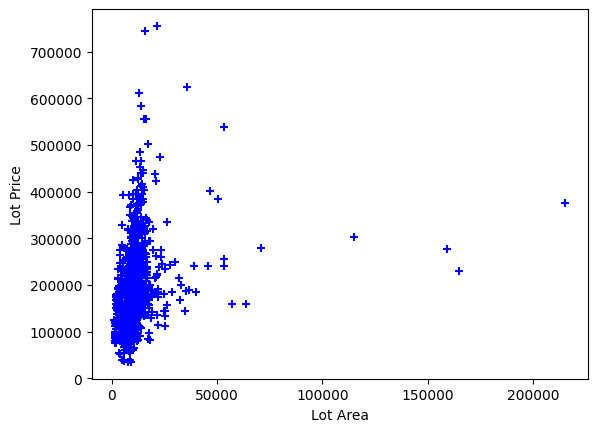

In [569]:
# The Dataframe is now mainly ready to be used

# plotting different features with price
plt.xlabel('Lot Area')
plt.ylabel('Lot Price')
plt.scatter(df['LotArea'],df['SalePrice'],color='blue',marker='+')
plt.show()

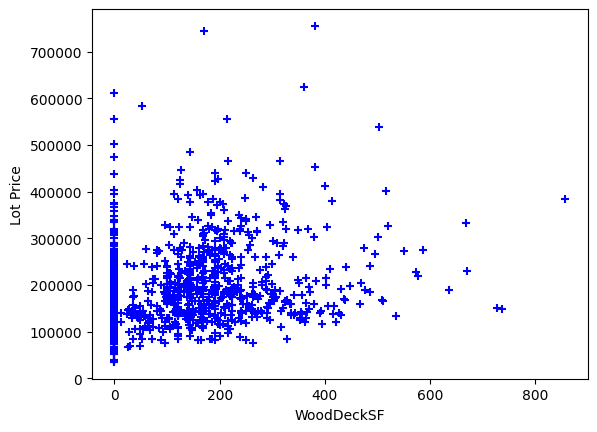

In [537]:
plt.xlabel('WoodDeckSF')
plt.ylabel('Lot Price')
plt.scatter(df['WoodDeckSF'],df['SalePrice'],color='blue',marker='+')
plt.show()

In [570]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [571]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['Age'] = df['YrSold'] - df['YearBuilt']
df['RemodelAge'] = df['YearRemodAdd'] - df['YearBuilt']

df = df.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF', 'YrSold', 'YearBuilt', 'YearRemodAdd'], axis='columns')

In [573]:
le = LabelEncoder()

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

In [575]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SaleType',

In [574]:
df[:20]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,TotalSF,Age,RemodelAge
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,2,8,4,208500,2566,5,0
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,5,8,4,181500,2524,31,0
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,9,8,4,223500,2706,7,1
3,4,70,3,9550,1,0,3,0,0,0,...,0,0,0,2,8,0,140000,2473,91,55
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,12,8,4,250000,3343,8,0
5,6,50,3,14115,1,0,3,0,4,0,...,0,0,700,10,8,4,143000,2158,16,2
6,7,20,3,10084,1,3,3,0,4,0,...,0,0,0,8,8,4,307000,3380,3,1
7,8,60,3,10382,1,0,3,0,0,0,...,0,0,350,11,8,4,200000,3197,36,0
8,9,50,4,6120,1,3,3,0,4,0,...,0,0,0,4,8,0,129900,2726,77,19
9,10,190,3,7420,1,3,3,0,0,0,...,0,0,0,1,8,4,118000,2068,69,11


In [587]:
correlation_matrix = df.corr()
essential_features = correlation_matrix.index[abs(correlation_matrix['SalePrice']) > 0.5]

train_data = df[essential_features]

X = train_data.drop('SalePrice', axis='columns')
Y = train_data['SalePrice']

essential_features

Index(['OverallQual', 'ExterQual', 'BsmtQual', 'GrLivArea', 'FullBath',
       'KitchenQual', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'SalePrice', 'TotalSF', 'Age'],
      dtype='object')

In [588]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=22)

# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(x_train,y_train)

In [589]:
KNN = KNeighborsClassifier()
KNN_param = {'n_neighbors': np.arange(2,11),
             'p': [1,2],
             'weights': ['uniform','distance']}
KNN_cv = GridSearchCV(estimator=KNN, param_grid=KNN_param , scoring='accuracy', cv=5)
KNN_cv.fit(x_train, y_train)
KNN_cv.best_params_

d:\Anaconda\envs\ML\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [590]:
KNN_best = KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')
KNN_best.fit(x_train,y_train)

KNN_best.score(x_test, y_test)

0.017123287671232876